# Merging Databases

In [6]:
import pandas as pd

help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how: str = 'inner', on=None, left_on=None, right_on=None, left_index: bool = False, right_index: bool = False, sort: bool = False, suffixes=('_x', '_y'), copy: bool = True, indicator: bool = False, validate=None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right fra

In [7]:
df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [8]:
df['Date'] = ['December 1', 'January 1', 'mid-May'] # adding values using the square bracket index operator. index is shared
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


In [9]:
df['Delivered'] = True # adding a scalar value which becomes the default value for the entire column
df

,Name,Item Purchased,Cost,Date,Delivered
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevyn,Kitty Litter,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-May,True


In [10]:
df['Feedback'] = ['Positive', None, 'Negative'] # when we need to input a few values, we must supply the None values ourselves
df

,Name,Item Purchased,Cost,Date,Delivered,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [11]:
# if rows have a unique index, we can assign a new column identifier to the series
adf = df.reset_index()

# think of it as create a index called 'Date' and set the value at row 0 to 'Dec 1'
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'}) 

adf

,index,Name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [12]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])

staff_df = staff_df.set_index('Name')

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])

student_df = student_df.set_index('Name')

print(staff_df.head())
print()
print(student_df.head())

Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [13]:
# call merge passing in 'left' df and 'right' df, using an outer join. We also tell merge that we want to use the left and right indices as the joining key(s). In this case, the indices are the same. 'outer' will sort keys lexicographically.
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [14]:
# inner join gives us a dataframe with just those students who are also staff
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [15]:
# left gives us a list of all staff regardless of whether they are students are not. if they are students, also gets their student details  
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [16]:
# right gives us a list of all students
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [17]:
# pd.merge can also use column names to join on

staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [18]:
# in cases where there is conflicting data, pandas preserves the data and appends either _x or _y depending on which dataframe it originated from
# _x - left dataframe
# _y - right dataframe

staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])

pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [19]:
# merge can be passed the suffixes parameter which takes a tuple to control how _x and _y are represented

pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name', suffixes=('_Staff', '_Student'))

,Name,Role,Location_Staff,School,Location_Student
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [20]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])

print(staff_df)
print()
print(student_df)

First Name   Last Name            Role
0      Kelly  Desjardins  Director of HR
1      Sally      Brooks  Course liasion
2      James       Wilde          Grader

  First Name Last Name       School
0      James   Hammond     Business
1       Mike     Smith          Law
2      Sally    Brooks  Engineering


In [21]:
# dataframes can also be merged on multiple column names and multi-indexes. The columns are passed as a list to the left_on/right_on parameteres. In this case, 'James Hammond' and 'James Wilde' will not satisfy the inner match condition.

pd.merge(staff_df, student_df, how='inner', left_on=['First Name', 'Last Name'], right_on=['First Name', 'Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Idiomatic Pandas: Making Code Pandorable

In [22]:
import pandas as pd, numpy as np, os

os.chdir('/Users/riro/Documents/GitHub/umich_ds/intro to data science/files')

df = pd.read_csv('census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [23]:
# Pandorable code using method chaining
(df.where(df['SUMLEV'] == 50).dropna().set_index(['STNAME', 'CTYNAME']).rename(columns={'ESTIMATESBASE2010' : 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [24]:
# Unpandorable code
df = df[df['SUMLEV'] == 50]
df.set_index(['STNAME', 'CTYNAME'], inplace = True)
df.rename(columns={'ESTIMATESBASE2010' : 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [25]:
# Using apply(): applies a function along an axis of the DataFrame. axis: '0' apply function to each column, '1' for each row

# min_max takes in a particular row of data, finds a min and max value and returns a new row of data
def min_max(row):

    # create a small slice by projecting the population columns
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    # create a new series with label values
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

# call apply on the dataframe
df.apply(min_max, axis=1)

min       max
STNAME  CTYNAME                              
Alabama Autauga County      54660.0   55347.0
        Baldwin County     183193.0  203709.0
        Barbour County      26489.0   27341.0
        Bibb County         22512.0   22861.0
        Blount County       57373.0   57776.0
...                             ...       ...
Wyoming Sweetwater County   43593.0   45162.0
        Teton County        21297.0   23125.0
        Uinta County        20822.0   21102.0
        Washakie County      8316.0    8545.0
        Weston County        7065.0    7234.0

[3142 rows x 2 columns]

In [26]:
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row

df.apply(min_max, axis = 1)


SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County           54571.0            54571.0          54660.0   
        Baldwin County          182265.0           182265.0         183193.0   
        Barbour County           27457.0            27457.0          27341.0   
        Bibb County              22915.0            22919.0          22861.0   
        Blount County            57322.0            57322.0          57373.0   
...                                  ...                ...              ...   
Wyoming Sweetwater County        43806.0            43806.0          43593.0   
        Teton County             21294.0            21294.0          21297.0   
        Uinta County             21118.0            21118.0          21102.0   
        Washakie County           8533.0             8533.0           8545.0   
        Weston County             7208.0             7208.0           7181.0   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County             55253.0          55175.0  ...   
        Baldwin County            186659.0         190396.0  ...   
        Barbour County             27226.0          27159.0  ...   
        Bibb County                22733.0          22642.0  ...   
        Blount County              57711.0          57776.0  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County          44041.0          45104.0  ...   
        Teton County               21482.0          21697.0  ...   
        Uinta County               20912.0          20989.0  ...   
        Washakie County             8469.0           8443.0  ...   
        Weston County               7114.0           7065.0  ...   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
        Bibb County               -6.201001         -0.177537   
        Blount County             -1.748766         -2.062535   
...                                     ...               ...   
Wyoming Sweetwater County         -5.339774        -14.252889   
        Teton County              19.525929         14.143021   
        Uinta County              -6.902954        -14.215862   
        Washakie County           -2.013502        -17.781491   
        Weston County             12.372583          1.533635   

                           RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  \
STNAME  CTYNAME                                                         
Alabama Autauga County            -2.530799     7.606016    -2.626146   
        Baldwin County            17.197872    15.844176    18.559627   
        Barbour County           -10.543299    -4.87

In [27]:
# Using lambda functions
rows = ['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME   CTYNAME          
Alabama  Autauga County        55347.0
         Baldwin County       203709.0
         Barbour County        27341.0
         Bibb County           22861.0
         Blount County         57776.0
                                ...   
Wyoming  Sweetwater County     45162.0
         Teton County          23125.0
         Uinta County          21102.0
         Washakie County        8545.0
         Weston County          7234.0
Length: 3142, dtype: float64

In [28]:
help(df.apply)

Help on method apply in module pandas.core.frame:

apply(func, axis=0, raw=False, result_type=None, args=(), **kwds) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
    
        * 0 or 'index': apply function to each column.
        * 1 or 'columns': apply function to each row.
    
    raw : bool, default False
        Determines if row or column is passed as a Series or ndarray object:
    
    

# Group by

In [29]:
# Looking at our backpacking equipment DataFrame, suppose we are interested in finding our total weight for each category. Use groupby to group the dataframe, and apply a function to calculate the total weight (Weight x Quantity) by category.

import pandas as pd, numpy as np 

df = pd.DataFrame({'Item': ['Pack', 'Tent',
                              'Sleeping Pad', 'Sleeping Bag', 'Water Bottles'],
                   'Category': ['Pack', 'Shelter', 'Sleep', 'Sleep', 'Kitchen'],           
                   'Quantity': [1, 1, 1, 1, 2],
                   'Weight (oz.)' : [33., 80., 27., 20., 35.]})

df = df.set_index('Item')
df

,Category,Quantity,Weight (oz.)
Item,,,
Pack,Pack,1,33.0
Tent,Shelter,1,80.0
Sleeping Pad,Sleep,1,27.0
Sleeping Bag,Sleep,1,20.0
Water Bottles,Kitchen,2,35.0


In [30]:
df.groupby(['Category']).apply(lambda x: sum(x['Quantity'] * x['Weight (oz.)']))

Category
Kitchen    70.0
Pack       33.0
Shelter    80.0
Sleep      47.0
dtype: float64

In [104]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [105]:
%%timeit -n 5

for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME'] == state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg) )

44155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state

In [107]:
%%timeit -n 5

# Using groupby is much quicker than iterating over the dataframe. groupby takes a col. name/names as an argument and splits the database based on those names



for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

55
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wy

In [34]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [35]:
# groupby can also be passed functions that are used for segmenting data

df = df.set_index('STNAME')

def fun(item):
    if item[0] < 'M':
        return 0
    if item[0] > 'Q':
        return 1
    else:
        return 2

# lightweight hashing which distributes tasks across multiple workers, eg. cores in a processor, nodes in a supercomputer or disks in a database 

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')
    

There are 1177 records in group 0 for processing.
There are 831 records in group 1 for processing.
There are 1134 records in group 2 for processing.


In [36]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV'] == 50]

In [37]:
# groupby's agg method applies a fucntion to the column/columns in a the group and returns the result.  

df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [38]:
print(type(df.groupby(level=0)['POPESTIMATE2010', 'POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


groupby.agg() with a dictionary when renaming has been deprecated (https://pandas.pydata.org/pandas-docs/stable/whatsnew/v0.20.0.html#whatsnew-0200-api-breaking-deprecate-group-agg-dict)

In [100]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg(np.sum, np.average).rename(columns={'POPESTIMATE2010': 'avg'}))

ValueError: No axis named <function average at 0x7fcdbcded8b0> for object type <class 'pandas.core.frame.DataFrame'>

In [101]:
df.groupby('STNAME').agg({'CENSUS2010POP' : [np.average , np.sum]})

CENSUS2010POP          
                            average       sum
STNAME                                       
Alabama                71339.343284   4779736
Alaska                 24490.724138    710231
Arizona               426134.466667   6392017
Arkansas               38878.906667   2915918
California            642309.586207  37253956
Colorado               78581.187500   5029196
Connecticut           446762.125000   3574097
Delaware              299311.333333    897934
District of Columbia  601723.000000    601723
Florida               280616.567164  18801310
Georgia                60928.635220   9687653
Hawaii                272060.200000   1360301
Idaho                  35626.863636   1567582
Illinois              125790.509804  12830632
Indiana                70476.108696   6483802
Iowa                   30771.262626   3046355
Kansas                 27172.552381   2853118
Kentucky               36161.391667   4339367
Louisiana              70833.937500   4533372
Maine                  83022.562500   1328361
Maryland              240564.666667   5773552
Massachusetts         467687.785714   6547629
Michigan              119080.000000   9883640
Minnesota              60964.655172   5303925
Mississippi            36186.548780   2967297
Missouri               52077.626087   5988927
Montana                17668.125000    989415
Nebraska               19638.075269   1826341
Nevada                158855.941176   2700551
New Hampshire         131647.000000   1316470
New Jersey            418661.619048   8791894
New Mexico             62399.363636   2059179
New York              312550.032258  19378102
North Carolina         95354.830000   9535483
North Dakota           12690.396226    672591
Ohio                  131096.636364  11536504
Oklahoma               48718.844156   3751351
Oregon                106418.722222   3831074
Pennsylvania          189587.746269  12702379
Rhode Island          210513.400000   1052567
South Carolina        100551.391304   4625364
South Dakota           12336.060606    814180
Tennessee              66801.105263   6346105
Texas                  98998.271654  25145561
Utah                   95306.379310   2763885
Vermont                44695.785714    625741
Virginia               60111.293233   7994802
Washington            172424.102564   6724540
West Virginia          33690.800000   1852994
Wisconsin              78985.916667   5686986
Wyoming                24505.478261    563626

In [41]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


# Data Scales

## (a,b)(c,d): Scales

As a data scientist, there are four scales worth knowing:

* Ratio scale
    * units are equally spaced
    * mathematical operations of +-/* are all valid
    * eg. height and weight

* Interval scale
    * units are equally spaced, but there is no true zero
    * eg. temperature, since there is never an abscence of temperature, where 0°C is a valid value

* Ordinal scale
    * the order of the units is important, but not evenly spaced
    * letter grades such as A, A+ are a good example

* Nominal scale
    * categories of data, but the categories have no order with respect to one another
    * categories where there are only two possible values are binary
    * eg. teams of a sport

Nominal data in pandas is called categorical data. pandas has a built-in type for categorical data and we can set a column of our data to categorical by using the astype method. astype changes the underlying type of the data, in this case to category data.


In [42]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                    index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])

df.rename(columns={0:'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [43]:
# set the data type as category using astype
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [115]:
# astype categories parameter deprecated, use pd.api.types.CategoricalDtype instead

grades = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                    index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor']).astype(pd.api.types.CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'], ordered = True))

grades.rename(columns={0: 'Grades'}, inplace = True)

In [116]:
grades.head()

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B


In [117]:
grades > 'C'

,Grades
excellent,True
excellent,True
excellent,True
good,True
good,True
good,True
ok,True
ok,False
ok,False
poor,False


In [47]:
s = pd.Series(['Low', 'Low', 'High', 'Medium', 'Low', 'High', 'Low'])
s.astype(pd.api.types.CategoricalDtype(categories = ['Low', 'Medium', 'High'], ordered = True))

0       Low
1       Low
2      High
3    Medium
4       Low
5      High
6       Low
dtype: category
Categories (3, object): [Low < Medium < High]

In [118]:
# get_dummies

s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [119]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [52]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Colu

# Cut

In [48]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [49]:
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg([np.average])

In [50]:
# Using cut

df.rename(columns={'average' : 'avg_pop'}, inplace = True)
pd.cut(df['avg_pop'], 10)

STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

In [51]:
s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 169, 182, 177, 180, 171])

pd.cut(s, 3, labels = ['Small', 'Medium', 'Large'])

0      Small
1     Medium
2      Small
3      Large
4      Small
5      Large
6     Medium
7     Medium
8      Small
9      Small
10    Medium
11    Medium
12    Medium
13     Small
dtype: category
Categories (3, object): [Small < Medium < Large]

# Pivot Tables

In [53]:
df = pd.read_csv('cars.csv')

In [54]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [55]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [56]:
# aggfunc can also be passed a list of functions, and pandas will provide the result using hierarchical column names
# we also pass margins = True, so for each category now there is an all category, which shows the overall mean and min values for each year for a given year and vendor
#  
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean, np.min], margins = True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

In [126]:
import pandas as pd, os
df = pd.read_csv('mpg.csv')

In [127]:
df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [59]:
df

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
5,2013,SMART,FORTWO ELECTRIC DRIVE CABRIOLET,TWO-SEATER,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,0,NaN,109,8
6,2013,SMART,FORTWO ELECTRIC DRIVE COUPE,TWO-SEATER,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,0,NaN,109,8
7,2013,TESLA,MODEL S (40 kWh battery),FULL-SIZE,270,A1,B,22.4,21.9,22.2,2.5,2.5,2.5,0,NaN,224,6
8,2013,TESLA,MODEL S (60 kWh battery),FULL-SIZE,270,A1,B,22.2,21.7,21.9,2.5,2.4,2.5,0,NaN,335,10
9,2013,TESLA,MODEL S (85 kWh battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,NaN,426,12


In [128]:
# see the cty and hwy mpg values for each car made by each manufacturer in every year in the dataset
df.pivot_table(values = ['cty', 'hwy'], index = ['manufacturer', 'class', 'model'], columns = 'year')

cty             \
year                                                 1999       2008   
manufacturer class      model                                          
audi         compact    a4                      18.250000  19.666667   
                        a4 quattro              16.500000  17.750000   
             midsize    a6 quattro              15.000000  16.500000   
chevrolet    2seater    corvette                15.500000  15.333333   
             midsize    malibu                  18.500000  19.000000   
             suv        c1500 suburban 2wd      13.000000  12.750000   
                        k1500 tahoe 4wd         12.500000  12.500000   
dodge        minivan    caravan 2wd             16.166667  15.400000   
             pickup     dakota pickup 4wd       12.250000  13.200000   
                        ram 1500 pickup 4wd     11.000000  11.571429   
             suv        durango 4wd             11.666667  12.000000   
ford         pickup     f150 pickup 4wd         13.000000  13.000000   
             subcompact mustang                 16.500000  15.400000   
             suv        expedition 2wd          11.000000  12.000000   
                        explorer 4wd            14.000000  13.000000   
honda        subcompact civic                   24.800000  24.000000   
hyundai      midsize    sonata                  18.000000  20.333333   
             subcompact tiburon                 19.000000  18.000000   
jeep         suv        grand cherokee 4wd      14.500000  13.166667   
land rover   suv        range rover             11.000000  12.000000   
lincoln      suv        navigator 2wd           11.000000  12.000000   
mercury      suv        mountaineer 4wd         13.500000  13.000000   
nissan       compact    altima                  20.000000        NaN   
             midsize    altima                        NaN  21.000000   
                        maxima                  18.500000  19.000000   
             suv        pathfinder 4wd          14.500000  13.000000   
pontiac      midsize    grand prix              17.000000  17.000000   
subaru       compact    impreza awd                   NaN  19.750000   
             subcompact impreza awd             19.500000        NaN   
             suv        forester awd            18.000000  19.250000   
toyota       compact    camry solara            19.500000  20.333333   
                        corolla                 24.666667  27.000000   
             midsize    camry                   19.500000  20.333333   
             pickup     toyota tacoma 4wd       15.250000  16.000000   
             suv        4runner 4wd             15.250000  15.000000   
                        land cruiser wagon 4wd  11.000000  13.000000   
volkswagen   compact    gti                     19.000000  21.500000   
                        jetta                   21.200000  21.250000   
             midsize    passat                  18.250000  19.000000   
             subcompact new beetle              26.000000  20.000000   

                                                      hwy             
year                                                 1999       2008  
manufacturer class      model                                         
audi         compact    a4                      27.500000  29.333333  
                        a4 quattro              25.250000  26.250000  
             midsize    a6 quattro              24.000000  24.000000  
chevrolet    2seater    corvette                24.500000  25.000000  
             midsize    malibu                  26.500000  28.333333  
             suv        c1500 suburban 2wd      17.000000  18.000000  
                        k1500 tahoe 4wd         16.000000  16.500000  
dodge        minivan    caravan 2wd             22.500000  22.200000  
             pickup     dakota pickup 4wd       16.500000  17.400000  
                        ram 1500 pickup 4wd     15.333333  15.285714  
             suv        durango 4w

# Date Functionality in pandas

In [61]:
import pandas as pd
import numpy as np

### Timestamp

In [62]:
pd.Timestamp('07/20/2020 10:05 AM')

Timestamp('2020-07-20 10:05:00')

### Period

In [63]:
pd.Period('1/2020')

Period('2020-01', 'M')

In [64]:
pd.Period('3/1/2020')

Period('2020-03-01', 'D')

### DatetimeIndex

In [65]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2020-07-18'), pd.Timestamp('2020-07-19'), pd.Timestamp('2020-07-20') ])
t1

2020-07-18    a
2020-07-19    b
2020-07-20    c
dtype: object

In [66]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Period Index

In [67]:
t2 = pd.Series(list('def'), [pd.Period('2020-04'), pd.Period('2020-05'), pd.Period('2020-06') ])
t2

2020-04    d
2020-05    e
2020-06    f
Freq: M, dtype: object

In [68]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [69]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
t3 = pd.DataFrame(np.random.randint(10, 100, (4, 2)), index = d1, columns=list('ab'))
t3

,a,b
2 June 2013,88,19
"Aug 29, 2014",16,40
2015-06-26,96,25
7/12/16,99,24


In [70]:
t3.index = pd.to_datetime(t3.index)
t3

,a,b
2013-06-02,88,19
2014-08-29,16,40
2015-06-26,96,25
2016-07-12,99,24


In [71]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [72]:
pd.Timestamp('9/3/2016') - pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [73]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with dates in a dataframe

In [74]:
dates = pd.date_range('10-01-2016', periods = 9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [75]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                   'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,98,119
2016-10-16,101,116
2016-10-30,104,118
2016-11-13,103,128
2016-11-27,102,125
2016-12-11,107,119
2016-12-25,113,123
2017-01-08,114,123
2017-01-22,116,121


In [152]:
# cumsum(): returns the cumulative sum of elements along a given axis

a = np.random.randint(1, 10, 9)
print(a)
b = a.cumsum()
print(b)

[1 2 3 3 1 6 5 4 1]
[ 1  3  6  9 10 16 21 25 26]


In [76]:
# weekday_name deprecated, use day_name() instead
df.index.day_name()

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [77]:
# diff(): calculates the difference of a DataFrame elements compared with another element in the DatFrame. defualts to the element of the previous row in the same column 
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,3.0,-3.0
2016-10-30,3.0,2.0
2016-11-13,-1.0,10.0
2016-11-27,-1.0,-3.0
2016-12-11,5.0,-6.0
2016-12-25,6.0,4.0
2017-01-08,1.0,0.0
2017-01-22,2.0,-2.0


In [78]:
# resample(): method for frequency conversion and resampling of a time series. Object must have a datetime index.

# DateOffset objects - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

df.resample('M').mean()

,Count 1,Count 2
2016-10-31,101.0,117.666667
2016-11-30,102.5,126.500000
2016-12-31,110.0,121.000000
2017-01-31,115.0,122.000000


In [79]:
# Using partial string indexing

df['2017']

,Count 1,Count 2
2017-01-08,114,123
2017-01-22,116,121


In [80]:
df['2016-12']

,Count 1,Count 2
2016-12-11,107,119
2016-12-25,113,123


In [81]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,107,119
2016-12-25,113,123
2017-01-08,114,123
2017-01-22,116,121


In [82]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,98,119
2016-10-09,98,119
2016-10-16,101,116
2016-10-23,101,116
2016-10-30,104,118
2016-11-06,104,118
2016-11-13,103,128
2016-11-20,103,128
2016-11-27,102,125
2016-12-04,102,125


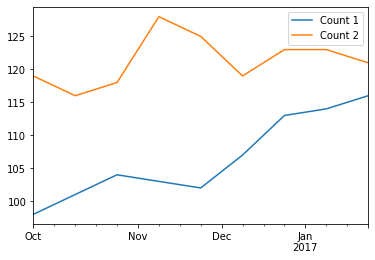

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()